# Inserindo o 20newsgroups e avaliando

In [45]:
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [6]:
dataset = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))

In [7]:
type(dataset)

sklearn.utils.Bunch

In [10]:
print(dataset.DESCR)
print(dataset.data[0])

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

In [11]:
dataset.target

array([7, 4, 4, ..., 3, 1, 8])

<AxesSubplot:xlabel='count'>

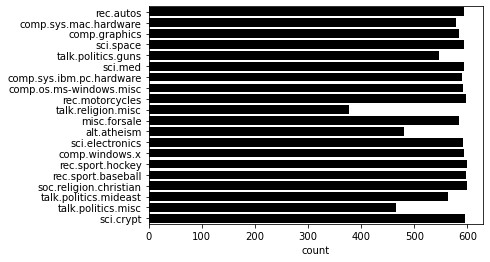

In [29]:
target_strs = [dataset.target_names[t_id] for t_id in dataset.target]
sns.countplot(y=target_strs, color='black')

# Utilizando os dados

In [30]:
X_train, y_train = fetch_20newsgroups(
    remove=('headers', 'footers', 'quotes'),
    subset='train',
    return_X_y=True
)

X_test, y_test = fetch_20newsgroups(
    remove=('headers', 'footers', 'quotes'),
    subset='test',
    return_X_y=True
)

In [67]:
count_vec = CountVectorizer(
    min_df=0.005,
    max_df=0.30, 
    stop_words='english',
    binary=True
)
count_vec.fit(X_train)
count_vec

CountVectorizer(binary=True, max_df=0.3, min_df=0.005, stop_words='english')

In [68]:
len(count_vec.vocabulary_)

2419

In [69]:
X_train_cv = count_vec.transform(X_train)
X_test_cv  = count_vec.transform(X_test)

In [70]:
X_train_cv.shape, X_test_cv.shape

((11314, 2419), (7532, 2419))

In [71]:
nb = MultinomialNB()
nb.fit(X_train_cv, y_train)

MultinomialNB()

In [72]:
nb.score(X_test_cv, y_test)

0.5646574614976102